# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

## Description

### Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

### Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

Do the users spend more time on the new landing page than on the existing landing page?
Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
Does the converted status depend on the preferred language?
Is the time spent on the new page the same for the different language users?
 

#### Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

user_id - Unique user ID of the person visiting the website

group - Whether the user belongs to the first group (control) or the second group (treatment)

landing_page - Whether the landing page is new or old

time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

converted - Whether the user gets converted to a subscriber of the news portal or not

language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [76]:
#library used for data manipulation and analysis
import pandas as pd 

# library used for working with arrays.
import numpy as np 

# library for plots and visualisations
import matplotlib.pyplot as plt 

# library for visualisations
import seaborn as sns 
%matplotlib inline 

# this library contains a large number of probability distributions as well as a growing library of statistical functions
import scipy.stats as stats 

## Reading the Data into a DataFrame

In [77]:
# read the data
df = pd.read_csv("C:/Users/Eldred OFUA/Desktop/Data Science and Business Analytics PG Program/2. Business Statistics/4.0 Project 2/abtest.csv")

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [78]:
# DataFrame Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observations:

    There are 4 object datatype columns and 2 numerical datatype columns.

    There are no missing data from the dataset given.

    user_id is an integer datatype. It is used as an identifier only, to identify the person visiting the site.
    
    time_spent_on_landing_page a float datatype.

    group, landing page, converted nad language_preferred are all object object datatypes.

In [79]:
# Checking the first five rows of the table under the heading row:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### Observations:

The DataFrame has 6 columns as mentioned in the Data Dictionary. Data in each row corresponds the details of what a visitor does on the site.

In [80]:
# Checking the last five rows of the table:

df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


#### Observations:

The DataFrame has 6 columns as mentioned in the Data Dictionary. The rows are complete 100 as shown in the dataFrame info.

In [81]:
# Checking the statistical summary:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


#### Observations:

User ID is just an identifier for each visitor to the site.

The time spent on the page ranges from 0.19 to 10.71 seconds, with an average time of around 5.37 seconds and a standard deviation of 2.38 seconds.

In [82]:
# Checking the fshape of the table:
df.shape

(100, 6)

#### Observations:
The Dataset has 100 number of rows and 6 number of columns.

In [83]:
# Checking for missing values

df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

### Observations

There are no missing values

### Univariate Analysis

### User ID

In [84]:
# Check Unique User ID
df['user_id'].nunique()

100

#### Observation:

    The are 100 unique user ID. This is a unique identifier for the people that entered the survey. It also shows that the sample size conducted is 100 persons.

#### Group

In [85]:
# Check Group
print(df['group'].nunique())

print(df['group'].value_counts())

2
control      50
treatment    50
Name: group, dtype: int64


#### Observation:

    There are 2 different groups that partook in the survey - Treatment and Control Group. The data set also have 50 persons in both groups.

#### Landing Page

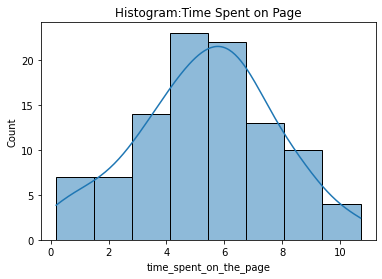

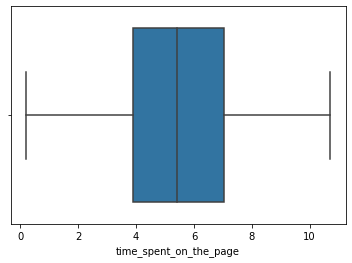

In [86]:
# Checking time spent on the page.

plt.title('Histogram:Time Spent on Page')
sns.histplot(data=df, x='time_spent_on_the_page', kde=True)
plt.show();
sns.boxplot(data=df, x='time_spent_on_the_page')
plt.show();

#### Observations:

    The average time and the median time spent on the page is almost equal. Hence, the normal distribution observed.
    The distribution of the time spent on the page shows that it is normally distributed.

#### Converted

In [87]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

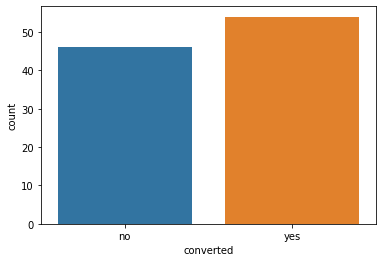

In [88]:
sns.countplot(data=df, x='converted');

#### Observations:

    There converted columns consist of 2 unique values - No and Yes.
    The distribution shows that the percentage of 'yes' is 54%, while the percentage of 'no' is 46%.

#### Preferred Language

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64


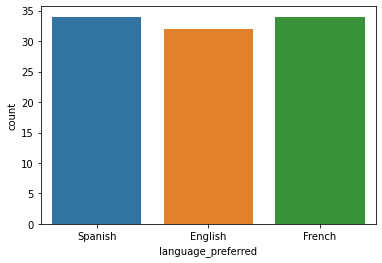

In [89]:

print(df['language_preferred'].value_counts())

sns.countplot(data=df, x='language_preferred');

#### Observations:

    The preferred language columns consist of 3 unique values - Spanish, English and French.
    The distribution shows that the percentage of 'Spanish' is 34%, the percentage of 'English' is 32% while the percentage of 'French' is 34%.

### Bivariate Analysis

Checking the conversion rate and the relationship between the control and treatment group with the time spent on both the old and new landing pages.

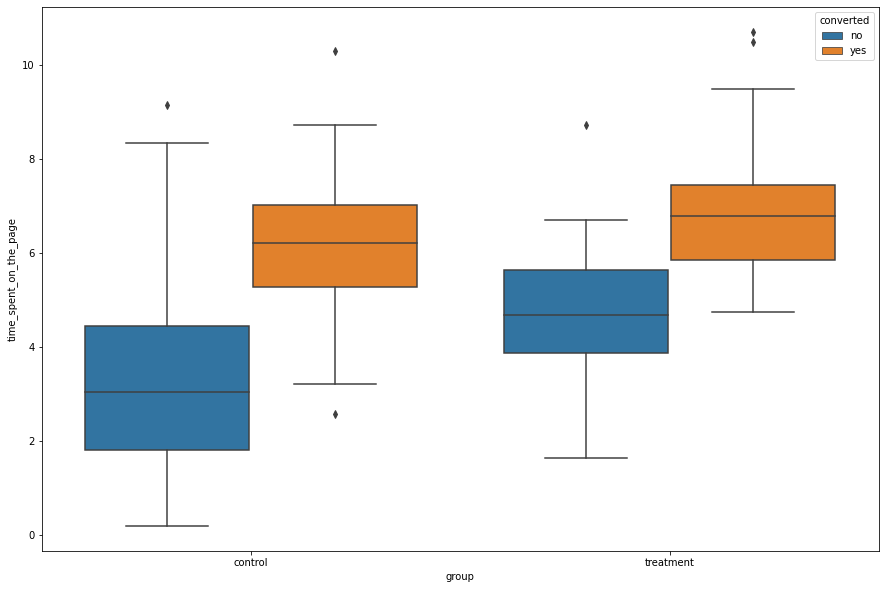

In [90]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, y='time_spent_on_the_page', x='group', hue = 'converted');

#### Observations:

    The control group and the treatment group have people that purchased subscription; and thses people spent more time on the landing page.
    There are outliers present in this data set.

Checking the relationship between the control and treatment group with the time spent on both the old and new landing pages in different languages.

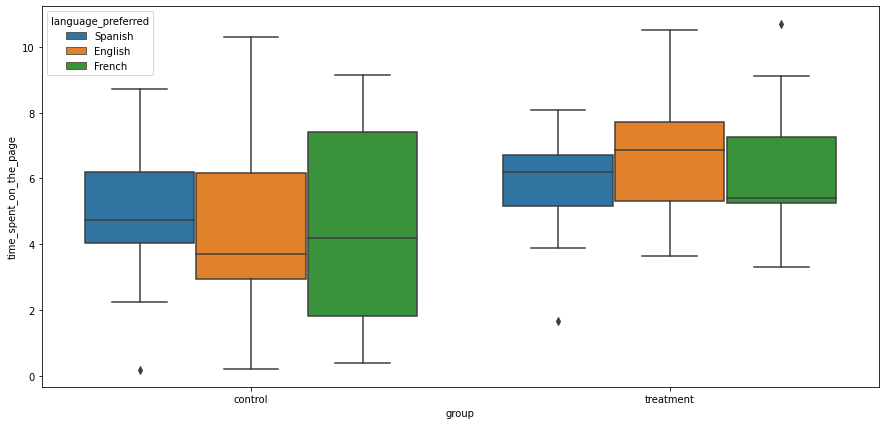

In [91]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, y='time_spent_on_the_page', x='group', hue = 'language_preferred');

Varying amount of time spent on the landing pages of both groups.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

Sample mean: 5.38


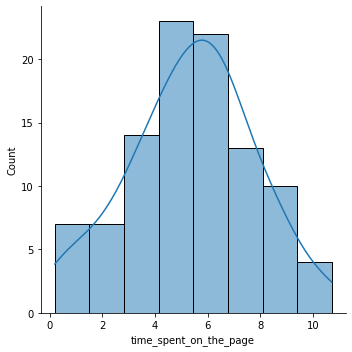

In [92]:
# plot the distribution plot of time spent on the page.
print('Sample mean:', np.round(df.time_spent_on_the_page.mean(),2))
sns.displot(df.time_spent_on_the_page, kde=True)
plt.show()

#### Observation

    The distribution of the time spent on the page follows a normal distribution curve.

### Step 1: Define the null and alternate hypotheses

The null and alternative hypothesis based on the above claim can be formulated as:

> $H_0:$ The mean time spent on the new landing page is less than or equal to 5.38 minutes. <br>

> $H_a:$ The mean time spent on the new landing page is greater than 5.38 minutes.

Let $\mu$ be the mean time spent on the new landing page of E-News Express website

Mathematically, the above formulated hypotheses can be written as:

>$H_0: \mu \le 5.38 $ <br>
$H_a: \mu > 5.38 $

### Step 2: Select Appropriate test

This is a case of a one-tailed test for the significance of a single mean. As the population standard deviation is unknown, a one-sample t-test will be appropriate to test the formulated hypotheses.

In a **one sample t-test**, we compare a sample mean with a hypothesized population mean to check if the sample mean differs significantly from the population mean. 

We are provided that the sample is randomly selected and we assume that it has come from a normally distributed population.

### Step 3: Decide the significance level

The level of significane (alpha) given is 0.05

### Step 4: Collect and prepare data

### Step 5: Calculate the p-value

- We will use the `ttest_1samp()` function from the `scipy.stats` library to perform a one-sample t-test.
- The `ttest_1samp()` function takes the sample observations, hypothesized population mean and the direction of the alternative hypothesis as input and returns the test statistic and the p-value for the test. 
    - The sample observations are the values of app engagement time in the dataset.
    - The hypotheisized population mean, as provided in the problem statement and defined in the formulated hypotheses is 6 hours
    - As it is a one-tailed test towards the right, we will set the argument `alternative = 'greater'`

In [93]:
hyp_mean = 5.38
t_stat, p_value = stats.ttest_1samp(df['time_spent_on_the_page'], hyp_mean, alternative='greater') # alternative argument is used to specify the tail of the test.

print("Test Statistic =",t_stat)
print("p-value =",p_value)

Test Statistic = -0.009250825749671452
p-value = 0.5036811848410435


### Step 6: Compare the p-value with $\alpha$

In [94]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.5036811848410435 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is greater than the 5% significance level, we accept the null hypothesis. Hence, we have enough statistical evidence to say that the mean time spent on the new landing page is lesser or equal to the population average (5.38 minutes).

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

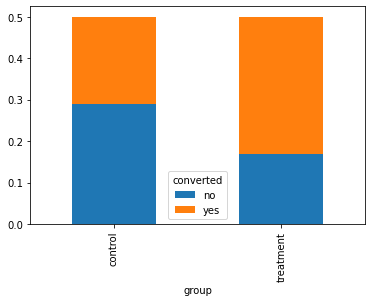

In [95]:
# visual analysis
pd.crosstab(df.group,df.converted,normalize=True).plot(kind='bar',stacked=True);

The proportion of converted users is higher in the Treatment group than the control group.
Based on the sample data, we can infer that the proportion of subscribers is higher for the Treatment group, but is this difference significant enough to conclude that convertion rate is greater on the new landing page?

#### Step 1: Define null and alternative hypotheses

𝐻0:  New landing page and convertion rate are independent of each other

𝐻𝑎:  New landing page and convertion rate are dependent on each other

#### Step 2: Select Appropriate test

To test the dependence between two categorical variables, a Chi-square test for independence is used.

A chi-square test for independence is a test based on the chi-square probability distribution. It involves the calculation of a chi-square test statistic. A chi-square (χ2) statistic is a measure of the difference between the observed and expected frequencies of the outcomes of a set of events or variables, given the size of the sample and the number of variables in the relationship. The idea behind the chi-square test is to compare what we observe in the random sample to what we expect to observe when we assume that there is no relationship between the two variables

#### Step 3: Decide the significance level

The level of significane (alpha) given is 0.05

#### Step 4: Collect and prepare data

Let's prepare the data for the test. To perform the chi-squared test of independance, we need to create the contingency table, for which we will use `pd.crosstab()`

In [96]:
# prepare a contingency table to perform the test
contingency_table = pd.crosstab(df.group, df.converted)
contingency_table

converted,no,yes
group,,
control,29,21
treatment,17,33


#### Step 5: Calculate the p-value

We will use the chi2_contingency function from the scipy stats library to perform the hypothesis test. It takes the contingency table as an input and returns the test statistic, p-value, degrees of freedom, and the expected frequencies as the output.

In [97]:
# import the required test function
from scipy.stats import chi2_contingency

# calculate the test results
chi, p_value, dof, expected = chi2_contingency(contingency_table)

print("Test Statistic =",chi)
print("p-value =",p_value)
print("Degrees of freedom =",dof)
print("Expected frequencies \n", expected)

Test Statistic = 4.871175523349437
p-value = 0.02730889175492232
Degrees of freedom = 1
Expected frequencies 
 [[23. 27.]
 [23. 27.]]


#### Step 6: Compare the p-value with $\alpha$

In [98]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.02730889175492232 is less than the level of significance, we reject the null hypothesis.


#### Step 7:  Draw inference

Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the new landing page and conversion rate are dependent on each other. Hence, convertion rate is greater in the treatment group.

## 3. Is the conversion and preferred language are independent or related?

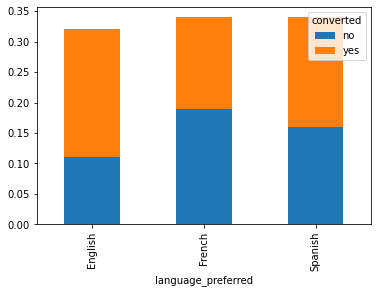

In [99]:
# visual analysis
pd.crosstab(df.language_preferred,df.converted,normalize=True).plot(kind='bar',stacked=True);

From the distribution, the proportion of converted users is higher in the English than French and Spanish respectively.
Based on the sample data, we can infer that the proportion of subscribers is higher English, but is this difference significant enough to conclude that convertion rate is dependent on the preferred language?

#### Step 1: Define null and alternative hypotheses

𝐻0:  Preferred languuage and convertion rate are independent of each other

𝐻𝑎:  Preferred language and convertion rate are related on each other

#### Step 2: Select Appropriate test

To test the dependence between two categorical variables, a Chi-square test for independence is used.

A chi-square test for independence is a test based on the chi-square probability distribution. It involves the calculation of a chi-square test statistic. A chi-square (χ2) statistic is a measure of the difference between the observed and expected frequencies of the outcomes of a set of events or variables, given the size of the sample and the number of variables in the relationship. The idea behind the chi-square test is to compare what we observe in the random sample to what we expect to observe when we assume that there is no relationship between the two variables

#### Step 3: Decide the significance level

The level of significane (alpha) given is 0.05

#### Step 4: Collect and prepare data

Let's prepare the data for the test. To perform the chi-squared test of independance, we need to create the contingency table, for which we will use `pd.crosstab()`

In [100]:
# prepare a contingency table to perform the test
contingency_table = pd.crosstab(df.language_preferred, df.converted)
contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


#### Step 5: Calculate the p-value

We will use the chi2_contingency function from the scipy stats library to perform the hypothesis test. It takes the contingency table as an input and returns the test statistic, p-value, degrees of freedom, and the expected frequencies as the output.

In [101]:
# calculate the test results
chi, p_value, dof, expected = chi2_contingency(contingency_table)

print("Test Statistic =",chi)
print("p-value =",p_value)
print("Degrees of freedom =",dof)
print("Expected frequencies \n", expected)

Test Statistic = 3.0930306905370832
p-value = 0.2129888748754345
Degrees of freedom = 2
Expected frequencies 
 [[14.72 17.28]
 [15.64 18.36]
 [15.64 18.36]]


#### Step 6: Compare the p-value with $\alpha$

In [102]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


#### Step 7:  Draw inference

Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that the preferred language and conversion rate are independent on each other.

## 4. Is the time spent on the new page same for the different language users?

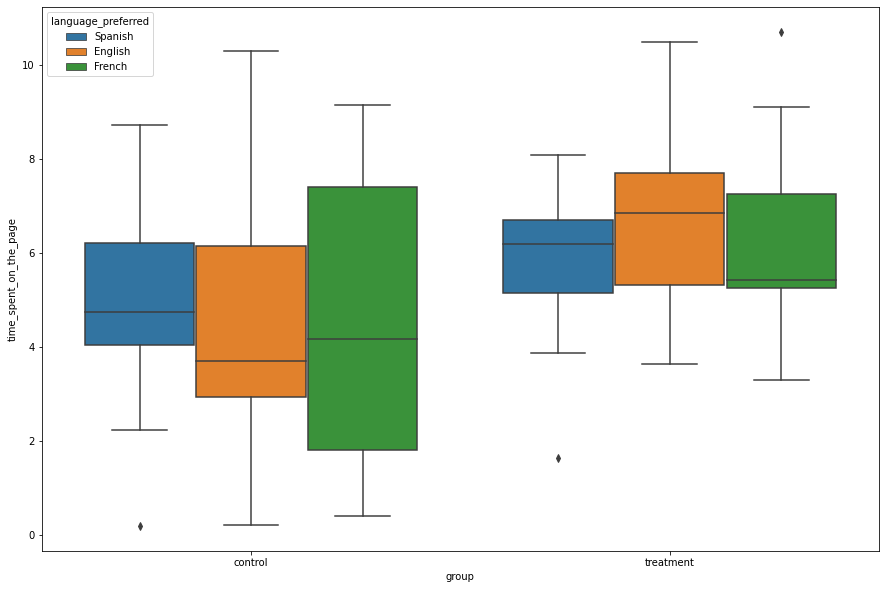

In [103]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, y='time_spent_on_the_page', x='group', hue = 'language_preferred');

#### Observation

The time spent for on the new page is different for the different languages.

English language have a minimum time of about 3.8 minutes, maximum time of aprrox. 10.5 minutes and a median time of approx. 7 minutes.

French language have a minimum time of about 3.6 minutes, maximum time of aprrox. 9.2 minutes and a median time of approx. 5.4 minutes. Also there is a lower outlier of apprx. 11 minutes

Spanish language have a minimum time of about 4 minutes, maximum time of aprrox. 8.2 minutes and a median time of approx. 6.4 minutes. Also there is a lower outlier of apprx. 1.8 minutes

## Conclusion and Business Recommendations

#### Conclusion:

1. The people that were converted in both groups spent more time on the landing pages. Hence a key indicator for conversion is making the visitors explore more on the landing page.

2. The average time spent on the landing pages from the data provided is 5.38 minutes.

3. Since the p-value (p-value = 0.5036811848410435 at 5% significance level), Hence, we have enough statistical evidence to say that the mean time spent on the new landing page is lesser or equal to the population average (5.38 minutes).

4. Since the p-value (p-value 0.02730889175492232 at 5% significance level), Hence, we have enough statistical evidence to say that the new landing page and conversion rate are dependent on each other. Hence, convertion rate is greater in the treatment group.

5. Since the p-value (p-value 0.02730889175492232 at 5% significance level). Hence, we have enough statistical evidence to say that the preferred language and conversion rate are independent on each other.

6. The time spect on the new landing page is different for the various languages.
    -English language have a minimum time of about 3.8 minutes, maximum time of aprrox. 10.5 minutes and a median time of approx. 7 minutes.
    -French language have a minimum time of about 3.6 minutes, maximum time of aprrox. 9.2 minutes and a median time of approx. 5.4 minutes. Also there is a lower outlier of apprx. 11 minutes
    -Spanish language have a minimum time of about 4 minutes, maximum time of aprrox. 8.2 minutes and a median time of approx. 6.4 minutes. Also there is a lower outlier of apprx. 1.8 minutes


#### Business Recommendation

1. More catchy contents should be uploaded on the landing pages to keep visitors to the page more engaged, since there is a direct link with visitors who were converted to the time spent on the page for both groups.

2. The new landing page should be used. It should also be updated at relatively frequent intervals.

3.  Further statistical analysis can be done to check if increasing the number of preferred languages will increase the time spent on the website, which may inturn increase the conversion rate.

4. English language had more onscreen time, hence it will be proper for the English landing page of the website to have more content.

5. Interactive polls and jingles should be added to the landing webpage as it will tend to make visitors feel involved, and give them a sense of being carried along

___